**Machine Learning Lab (PMCA507P)**

> **Guided by :** Dr.B.Saleena Ma'am

> **Reg No :** 23MCA1049 and 23MCA1030

>**Name :**  Neha Singh and Vinayak Kumar Singh

#Import necessary libraries

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

##Load the dataset

In [58]:
data = pd.read_csv('/content/StudentsPerformance.csv')
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race                     1000 non-null   object
 2   parental_education       1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
data

,gender,race,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Data preprocessing

## Encode categorical variables

In [60]:
label_encoders = {}
for column in ['gender', 'race', 'parental_education', 'lunch', 'test_preparation_course']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Feature selection
features = ['gender', 'race', 'parental_education', 'lunch', 'test_preparation_course',
            'math_score', 'reading_score', 'writing_score']
X = data[features]
y = data['math_score']  # Predicting math scores, you can change this to reading_score or writing_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.1386555
R^2 Score: 0.9953206912677982


In [61]:
# Define grading criteria
def get_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

# Apply grading criteria to predicted scores
predicted_grades = [get_grade(score) for score in y_pred]

# Get actual grades from the test set
actual_grades = [get_grade(score) for score in y_test]

# Compare predicted grades with actual grades
correct_predictions = sum(1 for pred, actual in zip(predicted_grades, actual_grades) if pred == actual)
total_predictions = len(predicted_grades)

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)


Accuracy: 0.99


In [62]:
# Define a function to calculate the score based on groups
def calculate_group_score(group):
    group_data = data[data['race'] == group]
    score = group_data[['math_score', 'reading_score', 'writing_score']].mean(axis=0)
    return score.mean()

# Calculate scores for each group
group_scores = {}
for group in data['race'].unique():
    group_scores[group] = calculate_group_score(group)

# Print the scores for each group
for group, score in group_scores.items():
    print(f"Group {group}: {score}")


Group 1: 65.46842105263157
Group 2: 67.13166144200626
Group 0: 62.99250936329588
Group 3: 69.1793893129771
Group 4: 72.75238095238096


In [63]:
# Calculate total score for each student
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

# Define grading criteria based on total marks
def get_grade(total_score):
    if total_score >= 240:
        return 'A'
    elif total_score >= 180:
        return 'B'
    elif total_score >= 120:
        return 'C'
    else:
        return 'D'

# Assign grades to students based on total marks
data['grade'] = data['total_score'].apply(get_grade)

# Print the grades for each student
print(data[['gender', 'race', 'parental_education', 'lunch', 'test_preparation_course', 'total_score', 'grade']])


     gender  race  parental_education  lunch  test_preparation_course  \
0         0     1                   1      1                        1   
1         0     2                   4      1                        0   
2         0     1                   3      1                        1   
3         1     0                   0      0                        1   
4         1     2                   4      1                        1   
..      ...   ...                 ...    ...                      ...   
995       0     4                   3      1                        0   
996       1     2                   2      0                        1   
997       0     2                   2      0                        0   
998       0     3                   4      1                        0   
999       0     3                   4      0                        1   

     total_score grade  
0            218     B  
1            247     A  
2            278     A  
3            148     C 

In [64]:
# Define grading criteria based on total marks
def get_grade(total_score):
    if total_score >= 240:
        return 'A'
    elif total_score >= 180:
        return 'B'
    elif total_score >= 120:
        return 'C'
    else:
        return 'D'

# Calculate total score for each student
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

# Assign grades to students based on total marks
data['grade'] = data['total_score'].apply(get_grade)

# Function to get grade based on index number
def get_grade_by_index(index_no):
    student_row = data.iloc[index_no]  # Retrieve the row corresponding to the index number
    return student_row['grade']  # Retrieve the grade from the 'grade' column

# Example usage:
index_no = 10  # Example index number
grade = get_grade_by_index(index_no)
print(f"Grade of student at index {index_no}: {grade}")


Grade of student at index 10: C


## Check for missing values in the dataset

In [65]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
gender                     0
race                       0
parental_education         0
lunch                      0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
total_score                0
grade                      0
dtype: int64


In [66]:
# Check unique values in the 'gender' column
unique_genders = data['gender'].unique()
print("Unique Genders:", unique_genders)


Unique Genders: [0 1]


In [67]:
# Mapping numeric values to categories
data['gender'] = data['gender'].map({0: 'female', 1: 'male'})

# Check unique values in the 'gender' column after mapping
unique_genders = data['gender'].unique()
print("Unique Genders:", unique_genders)


Unique Genders: ['female' 'male']


In [68]:
# Calculate average scores for male and female students
male_avg_scores = data[data['gender'] == 'male'][['math_score', 'reading_score', 'writing_score']].mean()
female_avg_scores = data[data['gender'] == 'female'][['math_score', 'reading_score', 'writing_score']].mean()

# Print average scores for male and female students
print("Average Scores for Male Students:")
print(male_avg_scores)
print("\nAverage Scores for Female Students:")
print(female_avg_scores)


Average Scores for Male Students:
math_score       68.728216
reading_score    65.473029
writing_score    63.311203
dtype: float64

Average Scores for Female Students:
math_score       63.633205
reading_score    72.608108
writing_score    72.467181
dtype: float64


In [69]:
# Calculate the differences in average scores
score_diff = female_avg_scores - male_avg_scores

# Print the comparison results
for subject, diff in score_diff.items():
    if diff > 0:
        print(f"Female students have a higher average score in {subject} by {diff:.2f} points.")
    elif diff < 0:
        print(f"Male students have a higher average score in {subject} by {abs(diff):.2f} points.")
    else:
        print(f"The average scores for male and female students are equal in {subject}.")



Male students have a higher average score in math_score by 5.10 points.
Female students have a higher average score in reading_score by 7.14 points.
Female students have a higher average score in writing_score by 9.16 points.


#Classification Algorithms

##Logistic Regression

 Let's apply the Logistic Regression classification algorithm to predict the gender of students based on their math, reading, and writing scores. We'll use the average scores as features for each gender.

In [70]:
# Check unique values in the target variable 'gender'
unique_genders = data['gender'].unique()
print("Unique Genders:", unique_genders)


Unique Genders: ['female' 'male']


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Define features (average scores) and target (gender)
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]  # Using individual scores as features
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)

# Convert predicted labels to binary integers
y_pred_binary = (y_pred == 'male').astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of Logistic Regression: 0.895
Precision: 0.9270833333333334
Recall: 0.8640776699029126
F1 Score: 0.8944723618090452


##CatBoost (for handling categorical features)



CatBoost is a gradient boosting algorithm that is capable of handling categorical features without the need for one-hot encoding.


In [72]:
pip install catboost


In [73]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features (average scores) and target (gender)
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]  # Using individual scores as features
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the CatBoost classifier
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = catboost.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of CatBoost Classifier:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='binary', pos_label='male')
recall = recall_score(y_test, y_pred, average='binary', pos_label='male')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='male')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Learning rate set to 0.009366
0:	learn: 0.6878159	total: 2ms	remaining: 2s
1:	learn: 0.6838789	total: 2.98ms	remaining: 1.49s
2:	learn: 0.6790134	total: 3.92ms	remaining: 1.3s
3:	learn: 0.6749127	total: 5.08ms	remaining: 1.27s
4:	learn: 0.6697372	total: 5.79ms	remaining: 1.15s
5:	learn: 0.6653012	total: 6.8ms	remaining: 1.13s
6:	learn: 0.6603551	total: 8.42ms	remaining: 1.19s
7:	learn: 0.6563165	total: 9.89ms	remaining: 1.23s
8:	learn: 0.6526847	total: 11.2ms	remaining: 1.24s
9:	learn: 0.6482910	total: 12.6ms	remaining: 1.24s
10:	learn: 0.6445322	total: 13.8ms	remaining: 1.24s
11:	learn: 0.6401105	total: 15.3ms	remaining: 1.26s
12:	learn: 0.6363281	total: 16.8ms	remaining: 1.28s
13:	learn: 0.6324478	total: 18.1ms	remaining: 1.27s
14:	learn: 0.6294023	total: 19.5ms	remaining: 1.28s
15:	learn: 0.6249326	total: 20.8ms	remaining: 1.28s
16:	learn: 0.6204132	total: 22.1ms	remaining: 1.28s
17:	learn: 0.6167057	total: 23.6ms	remaining: 1.29s
18:	learn: 0.6129420	total: 24.9ms	remaining: 1.28s


##Decision Tree

In [83]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/StudentsPerformance.csv')

# Define features and target
features = ['race', 'parental_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']
X = data[features]
y = data['gender']

# Encode categorical features
label_encoders = {}
for column in ['race', 'parental_education', 'lunch', 'test_preparation_course']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='female')  # Adjusted pos_label to 'female'
recall = recall_score(y_test, y_pred, pos_label='female')        # Adjusted pos_label to 'female'
f1 = f1_score(y_test, y_pred, pos_label='female')                # Adjusted pos_label to 'female'

print("Accuracy of Decision Tree:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy of Decision Tree: 0.84
Precision: 0.8571428571428571
Recall: 0.8041237113402062
F1-Score: 0.8297872340425533


<ipython-input-83-8ea53529574f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
<ipython-input-83-8ea53529574f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
<ipython-input-83-8ea53529574f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

##K-Nearest Neighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Define features and target
features = ['gender', 'race', 'parental_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']
X = data[features]
y = data['gender']

# Encode categorical features
label_encoders = {}
for column in ['gender', 'race', 'parental_education', 'lunch', 'test_preparation_course']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='female')  # Adjusted pos_label to 'female'
recall = recall_score(y_test, y_pred, pos_label='female')        # Adjusted pos_label to 'female'
f1 = f1_score(y_test, y_pred, pos_label='female')                # Adjusted pos_label to 'female'

print("Accuracy of K-Nearest Neighbors:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy of K-Nearest Neighbors: 0.91
Precision: 0.883495145631068
Recall: 0.9381443298969072
F1-Score: 0.9099999999999999


#Clustering Algorithms

##K Means Clustering

To perform K-Means clustering on the student performance dataset, we'll use the math, reading, and writing scores as features. K-Means clustering will help us group students based on their performance patterns in these subjects.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


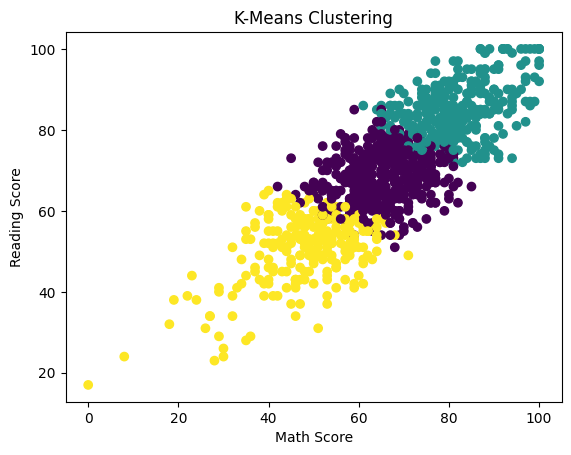

Number of students in each cluster:
cluster
0    443
1    308
2    249
Name: count, dtype: int64
Silhouette Score: 0.4054075393506606
Davies-Bouldin Index: 0.7941178880596214


In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define features (math, reading, writing scores)
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]

# Choose the number of clusters (k)
k = 3  # You can choose any number of clusters based on your requirements

# Create KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Visualize the clusters (for 2D representation)
plt.scatter(X['math_score'], X['reading_score'], c=cluster_labels, cmap='viridis')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('K-Means Clustering')
plt.show()

# Print the number of students in each cluster
print("Number of students in each cluster:")
print(data['cluster'].value_counts())

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette = silhouette_score(X, cluster_labels)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, cluster_labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)


##Hierarchial Clustering



Number of students in each cluster:
cluster
0    534
2    314
1    152
Name: count, dtype: int64
Silhouette Score: 0.35242898815984935
Davies-Bouldin Index: 0.8487755692543697


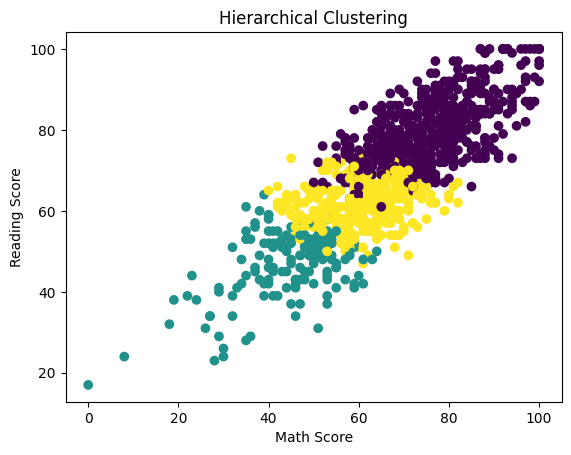

In [93]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define features (math, reading, writing scores)
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]

# Choose the number of clusters (k)
k = 3  # You can choose any number of clusters based on your requirements

# Create AgglomerativeClustering model
hierarchical_clustering = AgglomerativeClustering(n_clusters=k)

# Fit the model to the data
hierarchical_clustering.fit(X)

# Get cluster labels
cluster_labels = hierarchical_clustering.labels_

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Visualize the clusters (for 2D representation)
plt.scatter(X['math_score'], X['reading_score'], c=cluster_labels, cmap='viridis')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Hierarchical Clustering')


# Print the number of students in each cluster
print("Number of students in each cluster:")
print(data['cluster'].value_counts())

# Calculate silhouette score
silhouette = silhouette_score(X, cluster_labels)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, cluster_labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)

plt.show()

##Mean Shift

Number of clusters: 2
Silhouette Score for Mean Shift clustering: 0.4771159714556611
Davies-Bouldin Index for Mean Shift clustering: 0.5508029271834332


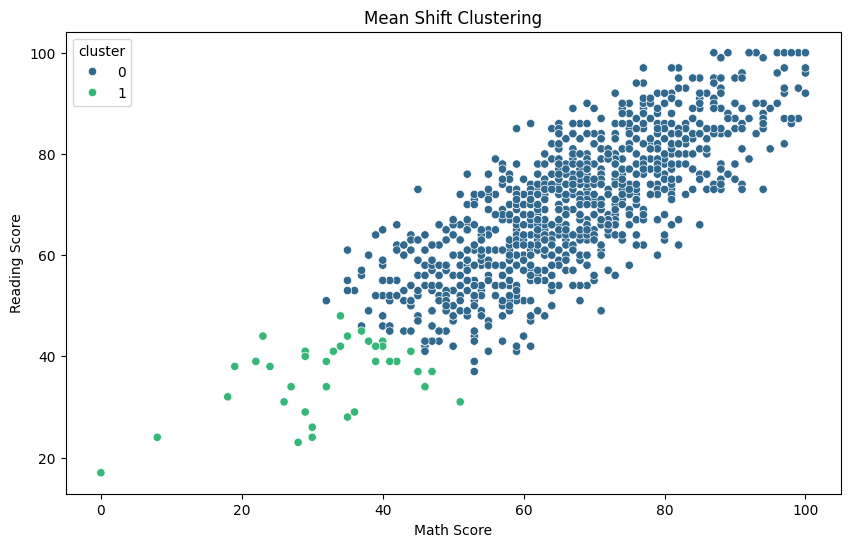

In [95]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Estimate the bandwidth for Mean Shift
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2)

# Apply Mean Shift clustering
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
cluster_labels = meanshift.fit_predict(X_scaled)

# Add the cluster labels to the dataset
data['cluster'] = cluster_labels

# Print the number of clusters
num_clusters = len(set(cluster_labels))
print("Number of clusters:", num_clusters)

# Visualize the clusters (for 2D representation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='math_score', y='reading_score', hue='cluster', data=data, palette='viridis', legend='full')
plt.title('Mean Shift Clustering')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')


# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score for Mean Shift clustering:", silhouette_avg)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies-Bouldin Index for Mean Shift clustering:", davies_bouldin_idx)
plt.show()


##DBSCAN clustering

Number of clusters: 1
Silhouette Score for DBSCAN clustering: 0.5407394797029375
Davies-Bouldin Index for DBSCAN clustering: 0.5889305208723276


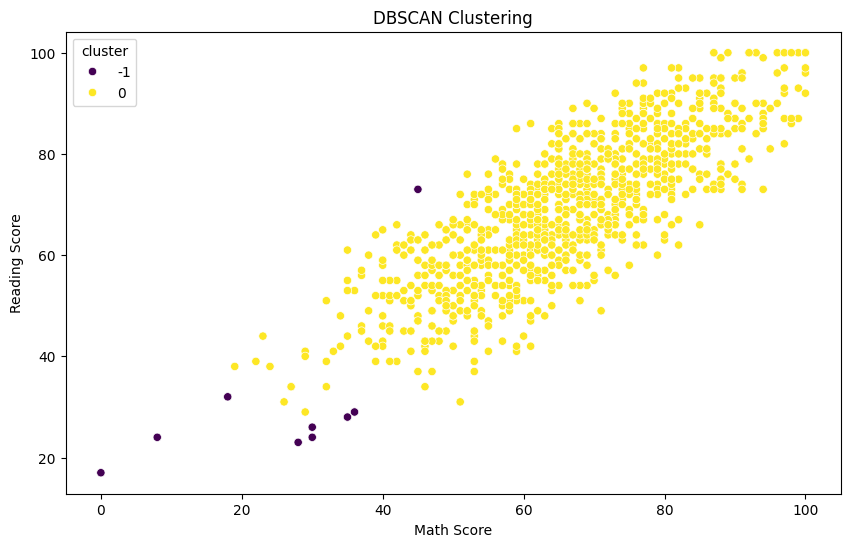

In [96]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Feature selection
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Get the cluster labels
cluster_labels = dbscan.labels_

# Add the cluster labels to the dataset
data['cluster'] = cluster_labels

# Print the number of clusters
print("Number of clusters:", len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0))

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score for DBSCAN clustering:", silhouette_avg)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies-Bouldin Index for DBSCAN clustering:", db_index)

# Visualize the clusters (for 2D representation)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='math_score', y='reading_score', hue='cluster', data=data, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

#Ensemble Classifiers/Deep Learning Techniques:



##Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features (math, reading, writing scores)
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)
# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='male')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='male')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label='male')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy of Random Forest Classifier: 0.87
Precision: 0.9139784946236559
Recall: 0.8252427184466019
F1 Score: 0.8673469387755103


##Artificial Neural Network

In [97]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define features (math, reading, writing scores)
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]
y = data['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Artificial Neural Network (ANN) classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = ann_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Artificial Neural Network Classifier:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='male')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='male')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label='male')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy of Artificial Neural Network Classifier: 0.9
Precision: 0.9368421052631579
Recall: 0.8640776699029126
F1 Score: 0.898989898989899


#Use Graphs to analyze the results:

##Confusion matrix

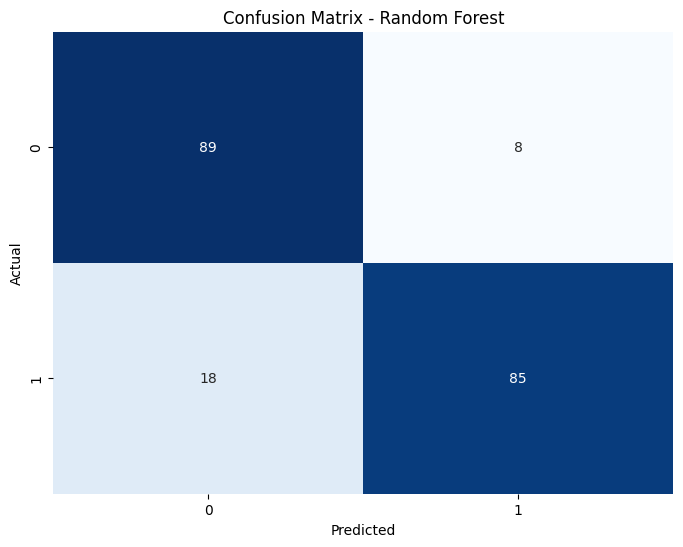

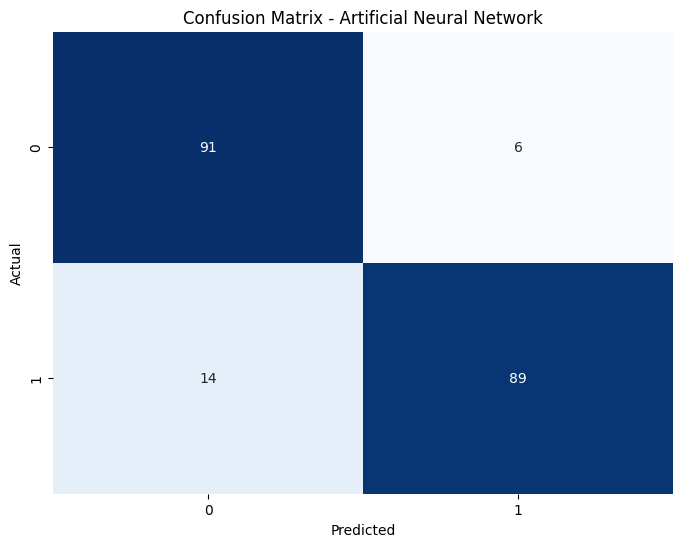

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Random Forest
y_pred_rf = random_forest.predict(X_test)  # Assuming 'random_forest' is the trained Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Generate confusion matrix for Artificial Neural Network
y_pred_ann = ann_classifier.predict(X_test_scaled)  # Assuming 'ann_classifier' is the trained ANN model
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Plot confusion matrix for Artificial Neural Network
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Artificial Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##Feature Importance Plot:

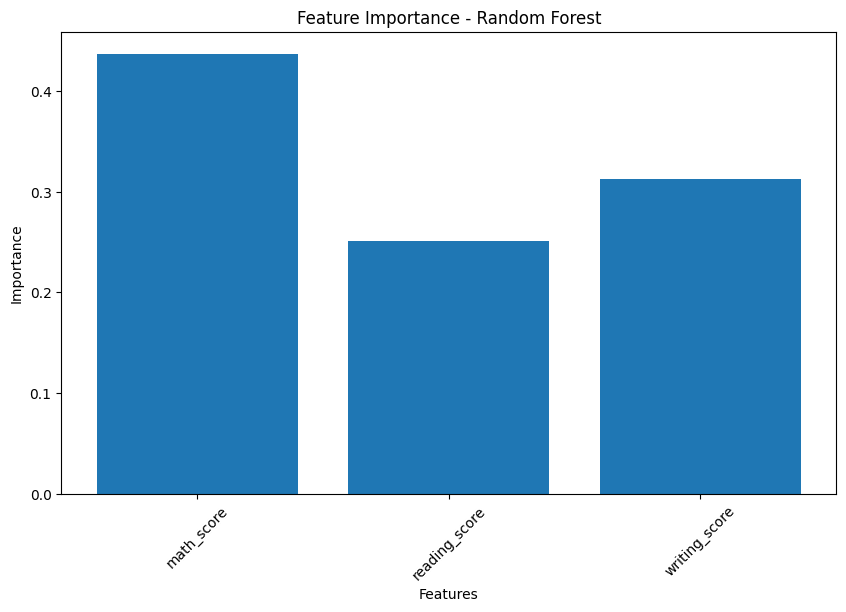

In [80]:
# Get feature importances from the Random Forest model
feature_importance = random_forest.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=45)
plt.show()


##Cluster Visualization:

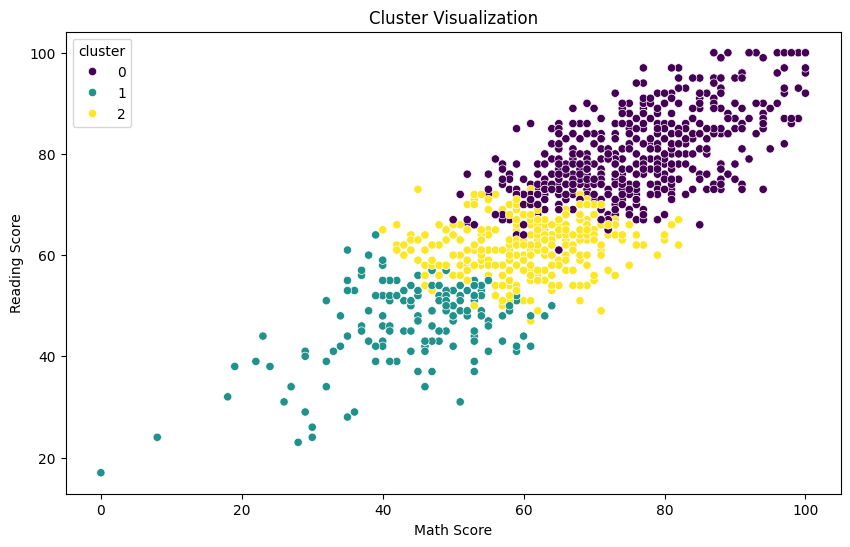

In [81]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='math_score', y='reading_score', hue='cluster', data=data, palette='viridis', legend='full')
plt.title('Cluster Visualization')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()


##Heatmap visualization

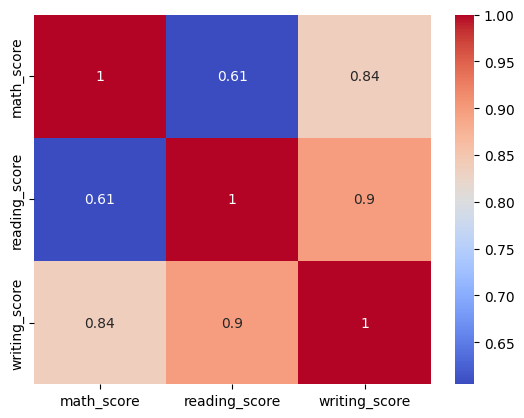

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'math_score': [72, 90, 85, 67, 55],
    'reading_score': [81, 75, 92, 43, 62],
    'writing_score': [74, 88, 95, 56, 65]
}
df = pd.DataFrame(data)

# Create a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
